<a href="https://colab.research.google.com/github/DsStudentSid/InitialPaythonAssignments/blob/master/NYC_Flight_DataEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# This is first project is done by Siddharth Desshpande(deshpandesiddha@yahoo.com) - Term1&2 EDA assignment in Python using concepts of Numpy, Pandas etc
# This project reads CSV data file for flights arrival and departure across different airport in NYC

# Problem Statement
# By Analysing Arrival and Departure time, can Airlines take actions to reduce/increase fleets 
# or decide if few flights can be flown from other nearby airports?


#Section 1: Import of all required Libraries, setup for specific need

import numpy as np

import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', -1)           # To display all the data in each column
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.

import matplotlib.pyplot as nyc_plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To apply seaborn styles to the plots.

# Install chart_studio, please use this command. 
!pip install chart-studio

# Install and update plotly using this command to the latest version (higher than version 4.0.0)
!pip install plotly --upgrade

# Making plotly specific imports
# These imports are necessary to use plotly offline without signing in to their website.
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly import tools
init_notebook_mode(connected=True)

#Section 2: load input data set whcih is CSV data file (flight departure and arrival timings)
df_flighttime = pd.read_csv(r'C:\Siddharth\Personal\IT-Banking\MaziMahiti\INSAID\Project1\NYC_Flight_Data.csv')
df_flighttime.head()

Requirement already up-to-date: plotly in c:\siddharth\personal\it-banking\mazimahiti\insaid\anaconda\lib\site-packages (4.4.1)


,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,1/1/2013 5:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,1/1/2013 5:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,1/1/2013 5:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,1/1/2013 5:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,1/1/2013 6:00


In [0]:
# Description of Dataset
# This dataset provide 2013 year inboud and oubound timings for different flight carriers departing from 3 airports in NYC-USA
# Data also provides information about delay in departing and arriving timings of flights.

df_flighttime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 19 columns):
year              336776 non-null int64
month             336776 non-null int64
day               336776 non-null int64
dep_time          328521 non-null float64
sched_dep_time    336776 non-null int64
dep_delay         328521 non-null float64
arr_time          328063 non-null float64
sched_arr_time    336776 non-null int64
arr_delay         327346 non-null float64
carrier           336776 non-null object
flight            336776 non-null int64
tailnum           334264 non-null object
origin            336776 non-null object
dest              336776 non-null object
air_time          327346 non-null float64
distance          336776 non-null int64
hour              336776 non-null int64
minute            336776 non-null int64
time_hour         336776 non-null object
dtypes: float64(5), int64(9), object(5)
memory usage: 48.8+ MB


In [0]:
#info function gives us the following insights into the df_menu dataframe:

#There are a total of 336776 samples (rows) and 19 columns in the dataframe.
#There are 14 columns with a numeric datatype and 5 columns with an object datatype.
#There are 6 columns with missing values in the data.


In [0]:
df_flighttime.describe()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
count,336776.0,336776.000000,336776.000000,328521.000000,336776.000000,328521.000000,328063.000000,336776.000000,327346.000000,336776.000000,327346.000000,336776.000000,336776.000000,336776.000000
mean,2013.0,6.548510,15.710787,1349.109947,1344.254840,12.639070,1502.054999,1536.380220,6.895377,1971.923620,150.686460,1039.912604,13.180247,26.230100
std,0.0,3.414457,8.768607,488.281791,467.335756,40.210061,533.264132,497.457142,44.633292,1632.471938,93.688305,733.233033,4.661316,19.300846
min,2013.0,1.000000,1.000000,1.000000,106.000000,-43.000000,1.000000,1.000000,-86.000000,1.000000,20.000000,17.000000,1.000000,0.000000
25%,2013.0,4.000000,8.000000,907.000000,906.000000,-5.000000,1104.000000,1124.000000,-17.000000,553.000000,82.000000,502.000000,9.000000,8.000000
50%,2013.0,7.000000,16.000000,1401.000000,1359.000000,-2.000000,1535.000000,1556.000000,-5.000000,1496.000000,129.000000,872.000000,13.000000,29.000000
75%,2013.0,10.000000,23.000000,1744.000000,1729.000000,11.000000,1940.000000,1945.000000,14.000000,3465.000000,192.000000,1389.000000,17.000000,44.000000
max,2013.0,12.000000,31.000000,2400.000000,2359.000000,1301.000000,2400.000000,2359.000000,1272.000000,8500.000000,695.000000,4983.000000,23.000000,59.000000


In [0]:
#describe function gives us the following insights into the data:

#Sched_dept_time column is having an almost normal distribution because the mean of sched_dept_time (1344.254840)
#value is close to the median of sched_dep_time(1359.00)value.
#Sched_arr_time column is having an almost normal distribution because the mean of sched_arr_time(1536.380220) 
#value is close to the median of sched_arr_time(1556.00) value.

#The distribution of dep_delay is positive (right) skewed because the mean of dep_delay (12.639070) 
#lies to the right of the median(50%) value (11.00), on a distribution plot. 
#The distribution of arr_delay is positive (right) skewed because the mean of arr_delay (6.895377) 
#lies to the right of the median(50%) value (-5.00), on a distribution plot. 

#The max value of dep_delay (1301.000) is an outlier because it lie far away from the mean value(12.639070).
#The max value of arr_delay (1272.000) is an outlier because it lie far away from the mean value(6.895377).
#Similarly comparing the 75% and max values of the other columns we can see that there are outliers present in some other columns.


In [0]:
# To install pandas profiling please run this command.

!pip install pandas-profiling --upgrade

Requirement already up-to-date: pandas-profiling in c:\siddharth\personal\it-banking\mazimahiti\insaid\anaconda\lib\site-packages (2.3.0)


In [0]:
import pandas_profiling

# To output pandas profiling report to an external html file.
# Saving the output as profiling_before_preprocessing.html

profile = df_flighttime.profile_report(title="NYC Flight data Profiling before Data Preprocessing")
profile.to_file(output_file="NYC flight_profiling_before_preprocessing.html")

In [0]:
#Observations from Pandas Profiling before Data Processing 

#Dataset info:
#Number of variables: 19
#Number of observations: 336776
#Missing cells: 46595 (0.7%)

#Variables types: 
#Numeric = 9
#Categorical = 5
#Text (Unique) = 0
#Rejected = 5

#year has constant value "2013".
#air_time & arr_time has 9430 highest % (2.8%) of missing values.
#arr_delay has 5409 (1.6%) of zeros.
#dep_delay is highly correlated with arr_delay (ρ = 0.9148027589).
#distance is highly correlated with air_time (ρ = 0.9906496472).
#dest has a high cardinality: 105 distinct values.

#arr_delay has a skewness of 3.71681748 and kurtosis of 29.233044.
#The distribution is positive (right) skewed as the mean (6.895376757) is to the right of the median (-5).
#95% samples have a arr_delay less than 91 mins.
#The high value of kurtosis implies that many values are there at the end and there is a presence of outliers in the data (maximum value = 1272 is an outlier).

#dep_time has a skewness of -0.02474345303 and kurtosis of -1.088319991.
#Minimum value = 1 is an outlier, as it lies far away from the Q1 (25th percentile) value (907) and 5th percentile (624).

#dest has data divided into 105 distinct values.
#O'Hare International Airport  has the highest share with 17283 samples (5.1% share) and then Breakfast has 49 samples (14.4% share).

#origin has data divided into 3 distinct values.
#EWR  has 120835 samples (35.9% share), JFK has 111279 samples (33.0% share) and LGA has 104662 samples (31.1% share).

#All the remaining columns can be studied in the same way.

In [0]:
#Now we will perform data processing on our dataset to make data usable for EDA

#we will drop Year column as all values are from 2013
#we will also drop columns flight, tail num as they do not provide any valuable information about data for EDA
df_flighttime.head()
df_backup = df_flighttime
df_flighttime.drop(['year', 'flight', 'tailnum'], axis=1, inplace=True)
df_flighttime.head()

,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,origin,dest,air_time,distance,hour,minute,time_hour
0,1,1,517.0,515,2.0,830.0,819,11.0,UA,EWR,IAH,227.0,1400,5,15,1/1/2013 5:00
1,1,1,533.0,529,4.0,850.0,830,20.0,UA,LGA,IAH,227.0,1416,5,29,1/1/2013 5:00
2,1,1,542.0,540,2.0,923.0,850,33.0,AA,JFK,MIA,160.0,1089,5,40,1/1/2013 5:00
3,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,JFK,BQN,183.0,1576,5,45,1/1/2013 5:00
4,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,LGA,ATL,116.0,762,6,0,1/1/2013 6:00


In [0]:
#dep_time (float), sched_dep_time (int), arr_time (float) and sched_arr_time (int) are numberic fields. 
#we need to convert them in _datetime format

#print(pd.to_datetime((str(df_flighttime.dep_time[0]/100),'%H:M')))
#df_flighttime['Time'] = pd.to_datetime(df_flighttime['dep_time'], format='%H%M').dt.time
#df_flighttime["new_deptime"] = pd.to_datetime(df_flighttime.dep_time)).dt.strftime('%H:%M')
#pd.to_datetime datetime to_datetime(df_flighttime.dep_time/100, format='%H%M')
#a = (df_flighttime.dep_time[0]/100)
#df_flighttime.dept_time = df_flighttime.dep_time.str[:2] + ':' + df_flighttime.dep_time.str[-2:]
#print(a)
#df_flighttime
#df_flighttime
#df_flighttime.assign(newtime=pd.to_datetime(df_flighttime.dep_time, format='%H%M').dt.time)
#df_flighttime.head()

In [0]:
#Identifying which colummns have NULL values
#df_flighttime = df_backup
df_flighttime.isnull().sum()

month             0   
day               0   
dep_time          8255
sched_dep_time    0   
dep_delay         8255
arr_time          8713
sched_arr_time    0   
arr_delay         9430
carrier           0   
origin            0   
dest              0   
air_time          9430
distance          0   
hour              0   
minute            0   
time_hour         0   
dtype: int64

In [0]:
#As few values in Dep_time are NULL, considering sched_dep_time same as actual dep_time for those flights
#copying sched_dep_time to dep_time where values are NULL
df_flighttime["dep_time"] = df_flighttime["dep_time"].fillna(df_flighttime["sched_dep_time"])

#As few values in arr_time are NULL, considering sched_arr_time same as actual arr_time for those flights
#copying sched_arr_time to arr_time where values are NULL
df_flighttime["arr_time"] = df_flighttime["arr_time"].fillna(df_flighttime["sched_arr_time"])

# Converting 24:00 to 00:00 time
df_flighttime["dep_time"] = df_flighttime["dep_time"].astype(str).str.replace('2400', '0000')
df_flighttime["arr_time"] = df_flighttime["arr_time"].astype(str).str.replace('2400', '0000')

#Making all dep_delay and arr_delay values to '0' where NULL
df_flighttime['dep_delay'] = df_flighttime['dep_delay'].fillna(0)
df_flighttime['arr_delay'] = df_flighttime['arr_delay'].fillna(0)

#Finding median of air_time rows where values are non-NULL
air_time_median = df_flighttime[~(df_flighttime['air_time'] == '')]['air_time'].median()
df_flighttime["air_time"] = df_flighttime["air_time"].fillna(air_time_median)

#Adding Leading Zeros to make total Length of the column to 4
df_flighttime['dep_time'] = df_flighttime['dep_time'].astype(str).str.zfill(6)
df_flighttime['sched_dep_time'] = df_flighttime['sched_dep_time'].astype(str).str.zfill(4)
df_flighttime['arr_time'] = df_flighttime['arr_time'].astype(str).str.zfill(6)
df_flighttime['sched_arr_time'] = df_flighttime['sched_arr_time'].astype(str).str.zfill(4)

#Removing decimal places from String values to convert in timestamps
df_flighttime['dep_time'] = df_flighttime['dep_time'].astype(str).replace('\.0', '', regex=True)
df_flighttime['sched_dep_time'] = df_flighttime['sched_dep_time'].astype(str).replace('\.0', '', regex=True)
df_flighttime['arr_time'] = df_flighttime['arr_time'].astype(str).replace('\.0', '', regex=True)
df_flighttime['sched_arr_time'] = df_flighttime['sched_arr_time'].astype(str).replace('\.0', '', regex=True)
df_flighttime['air_time'] = df_flighttime['air_time'].astype(str).replace('\.0', '', regex=True)

#converting into Timestamp format
#df_flighttime.dep_time[0] = '0517'
#df_flighttime.dep_time[0] = pd.to_datetime(df_flighttime.dep_time[0], format='%H%M')
#print(type(df_flighttime.dep_time[0]))
df_flighttime.dep_time = df_flighttime.dep_time.astype(str)
df_flighttime.dep_time = df_flighttime.dep_time.str[:2] + ':' + df_flighttime.dep_time.str[-2:]
df_flighttime['dep_time'] = pd.to_datetime(df_flighttime['dep_time'], format='%H:%M').dt.time

df_flighttime.arr_time = df_flighttime.arr_time.astype(str)
df_flighttime.arr_time = df_flighttime.arr_time.str[:2] + ':' + df_flighttime.arr_time.str[-2:]
df_flighttime['arr_time'] = pd.to_datetime(df_flighttime['arr_time'], format='%H:%M').dt.time

df_flighttime.sched_dep_time = df_flighttime.sched_dep_time.astype(str)
df_flighttime.sched_dep_time = df_flighttime.sched_dep_time.str[:2] + ':' + df_flighttime.sched_dep_time.str[-2:]
df_flighttime['sched_dep_time'] = pd.to_datetime(df_flighttime['sched_dep_time'], format='%H:%M').dt.time

df_flighttime.sched_arr_time = df_flighttime.sched_arr_time.astype(str)
df_flighttime.sched_arr_time = df_flighttime.sched_arr_time.str[:2] + ':' + df_flighttime.sched_arr_time.str[-2:]
df_flighttime['sched_arr_time'] = pd.to_datetime(df_flighttime['sched_arr_time'], format='%H:%M').dt.time

#for i in range(91492,91495):
#   print (i, df_flighttime.iloc[i]['dep_time'])
#for i in range(815,819):
#   print (i, df_flighttime.iloc[i]['arr_time'])
#for i in range(1775,1784):
#   print (i, df_flighttime.iloc[i]['dep_delay'])
#for i in range(1775,1784):
#    print (i, df_flighttime.iloc[i]['arr_delay'])
#for i in range(471,754):
#    print (i, df_flighttime.iloc[i]['air_time'])
#for i in range(0,10):
#    print (i, df_flighttime.iloc[i]['sched_dep_time'])
#for i in range(1700,3580):
#    print (i, df_flighttime.iloc[i]['arr_time'])
#for i in range(56778,56809):
#    print (i, df_flighttime.iloc[i]['sched_arr_time'])

In [0]:
df_flighttime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 16 columns):
month             336776 non-null int64
day               336776 non-null int64
dep_time          336776 non-null object
sched_dep_time    336776 non-null object
dep_delay         336776 non-null float64
arr_time          336776 non-null object
sched_arr_time    336776 non-null object
arr_delay         336776 non-null float64
carrier           336776 non-null object
origin            336776 non-null object
dest              336776 non-null object
air_time          336776 non-null object
distance          336776 non-null int64
hour              336776 non-null int64
minute            336776 non-null int64
time_hour         336776 non-null object
dtypes: float64(2), int64(5), object(9)
memory usage: 41.1+ MB


In [0]:
df_flighttime.head()

,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,origin,dest,air_time,distance,hour,minute,time_hour
0,1,1,05:17:00,05:15:00,2.0,08:30:00,08:19:00,11.0,UA,EWR,IAH,227,1400,5,15,1/1/2013 5:00
1,1,1,05:33:00,05:29:00,4.0,08:50:00,08:30:00,20.0,UA,LGA,IAH,227,1416,5,29,1/1/2013 5:00
2,1,1,05:42:00,05:40:00,2.0,09:23:00,08:50:00,33.0,AA,JFK,MIA,160,1089,5,40,1/1/2013 5:00
3,1,1,05:44:00,05:45:00,-1.0,10:04:00,10:22:00,-18.0,B6,JFK,BQN,183,1576,5,45,1/1/2013 5:00
4,1,1,05:54:00,06:00:00,-6.0,08:12:00,08:37:00,-25.0,DL,LGA,ATL,116,762,6,0,1/1/2013 6:00


In [0]:
#Calculating Taxing_Time = (Arr_time - Dep_time) - Air_time
#import datetime

#t1 = pd.to_datetime('1/1/2015 01:00')
#t2 = pd.to_datetime('1/1/2015 03:30')

#type(df_flighttime.dep_time[0])
#t1 = df_flighttime['dep_time'].astype('datetime')
#t2 = df_flighttime['arr_time'].astype('datetime')
#type(t1)
#type(t2)
#date = str(datetime.datetime.strptime('2018-01-01', '%Y-%m-%d').date())
#df_flighttime['dep_time'] = pd.to_datetime(date + " " + df_flighttime.dep_time.astype(str))
#df_flighttime['arr_time'] = pd.to_datetime(date + " " + df_flighttime.arr_time.astype(str))
#print(pd.Timedelta(t2 - t1).seconds / 60.0)
#print(df_flighttime.taxi_time)
#df_flighttime.assign(taxi_time = ((df_flighttime.arr_time) - (df_flighttime.dep_time))/timedelta(minutes=1))#- df_flighttime.air_time)
#df_flighttime.info()



In [0]:
# To output pandas profiling report to an external html file.
# Saving the output as NYC flight_profiling_after_preprocessing.html

profile = df_flighttime.profile_report(title="NYC Flight data Profiling after Data Preprocessing")
profile.to_file(output_file="NYC flight_profiling_after_preprocessing.html")

In [0]:
#EDA based on below questions.

# - Based on airports - 
# 1. How many flights departed from each airport (JFK, EWR and LGA), which is bussiest airport?
# 2. Which is most commonly used airlines amoung airports in NYC?
# 3. which are top 10 destinations prefeted by customers for travel

# - Based on flight timings -
# 4. How many flights departed early time (depart delay is <= -1)
# 5. How many flights departed on time (depart delay = 0)
# 6. How many flights departed late (depart delay is >=1)
# 7. Monthly categorization of delay
# 7. How many short distance flights (air_time <=120)
# 8. How many mderate distance flights (air_time > 120 mins)

In [0]:
# 1. How many flights departed from each airport (JFK, EWR and LGA), which is bussiest airport?

df_flighttime['origin'].value_counts()

EWR    120835
JFK    111279
LGA    104662
Name: origin, dtype: int64

Text(0.5, 1.0, 'Pie chart showing the proportion of each of 3 Airports in NYC')

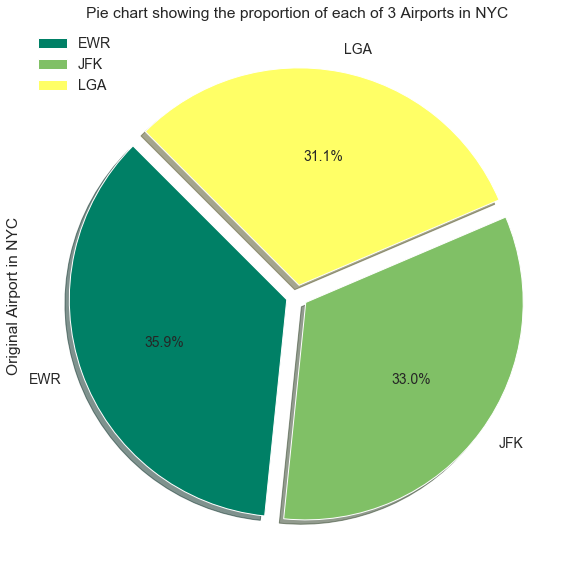

In [0]:
df_flighttime['origin'].value_counts().plot(kind='pie', explode=[0.05,0.05,0.05], fontsize=14, autopct='%3.1f%%', 
                                               figsize=(10,10), shadow=True, startangle=135, legend=True, cmap='summer')

nyc_plt.ylabel('Original Airport in NYC')
nyc_plt.title('Pie chart showing the proportion of each of 3 Airports in NYC')

Text(0.5, 0, 'Count')

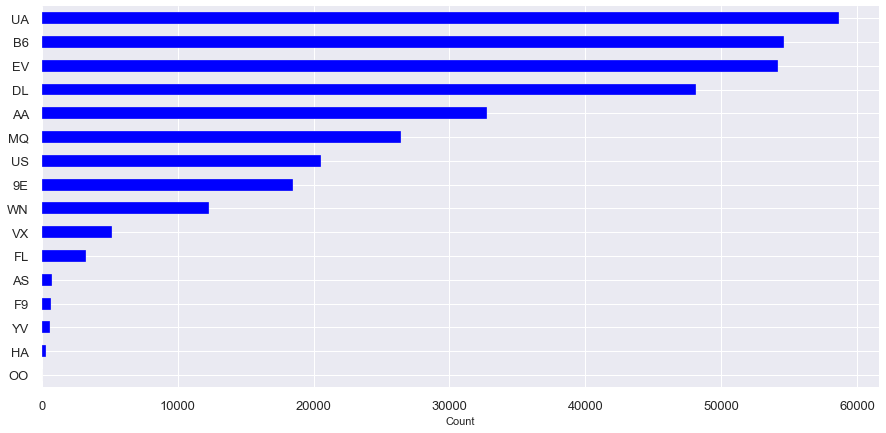

In [0]:
# 2. Which is most commonly used airlines amoung airports in NYC?.

df_flighttime['carrier'].value_counts().sort_values().plot(kind='barh', figsize=(15,7), fontsize=13, color='blue')
nyc_plt.xlabel('Count')

#United Airlines(UA), Jet Blue (B9) and Delta Airlines (DL) are top 3 motsly used carrier in US as majority of the custmers flying from 3 major airports within NYC prefer this airline.

Text(0, 0.5, 'Count')

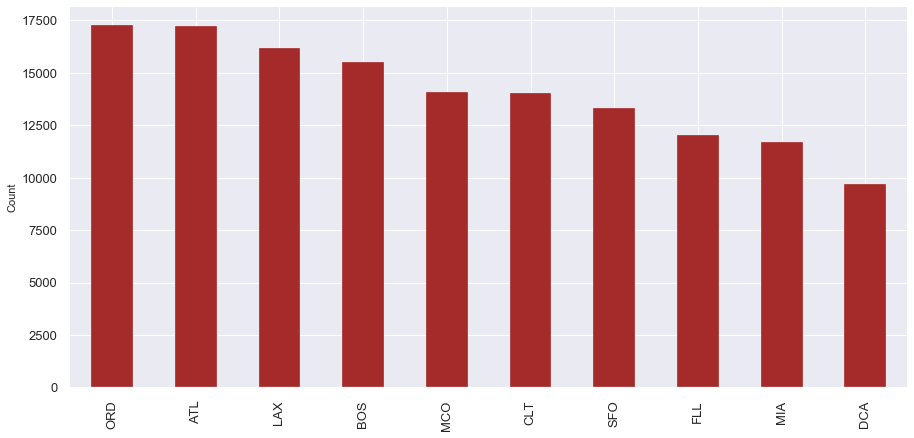

In [0]:
# 3. which are top 10 destinations prefeted by customers for travel

df_flighttime['dest'].value_counts().sort_values(ascending=False)[:10].plot(kind='bar', figsize=(15,7), fontsize=13, color='brown')
nyc_plt.ylabel('Count')

#O'Hare International Airport(ORD), Atlanta International Airport (ATL) and Los Angeles International Airport (LAX) are top 3 destinations US prefered by the custmers.

In [0]:
#4. How many flights departed early time (depart delay is <= -1)
# 5. How many flights departed on time (depart delay = 0)
# 6. How many flights departed late (depart delay is >=1)

for delay in df_flighttime:
    df_flighttime.loc[df_flighttime['dep_delay'] == 0, 'Status'] = 'On_Time'
    df_flighttime.loc[df_flighttime['dep_delay'] >= 1, 'Status'] = 'Delayed_Departure'
    df_flighttime.loc[df_flighttime['dep_delay'] <= -1, 'Status'] = 'Before_Time_Departure'

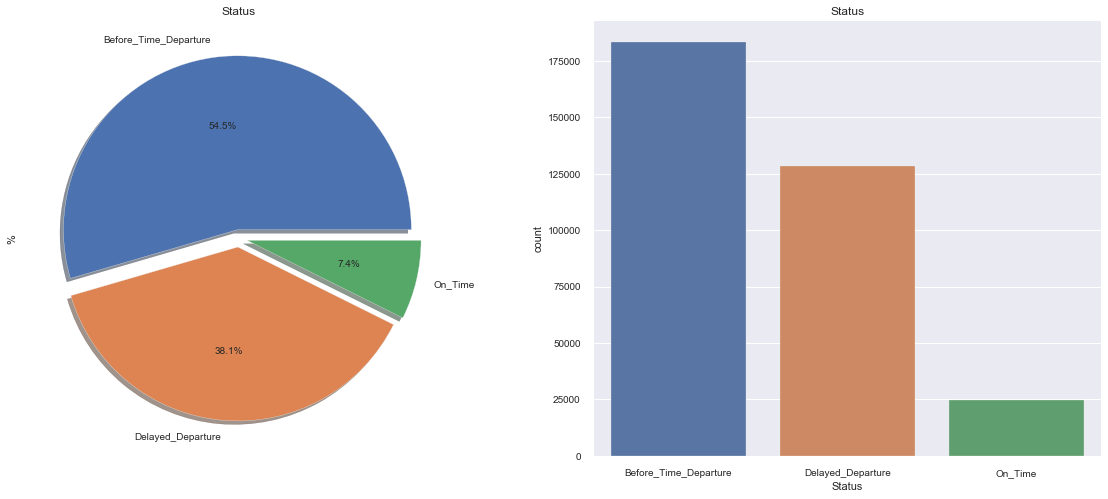

Status represents wether the flight was departed on time (0), delayed (>=1), Before Time (<=1)


In [0]:
f,ax=nyc_plt.subplots(1,2,figsize=(20,8))
df_flighttime['Status'].value_counts().plot.pie(explode=[0.05,0.05,0.05],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Status')
ax[0].set_ylabel('%')
sns.countplot('Status',order = df_flighttime['Status'].value_counts().index, data=df_flighttime,ax=ax[1])
ax[1].set_title('Status')
nyc_plt.show()

print('Status represents wether the flight was departed on time (0), delayed (>=1), Before Time (<=1)')

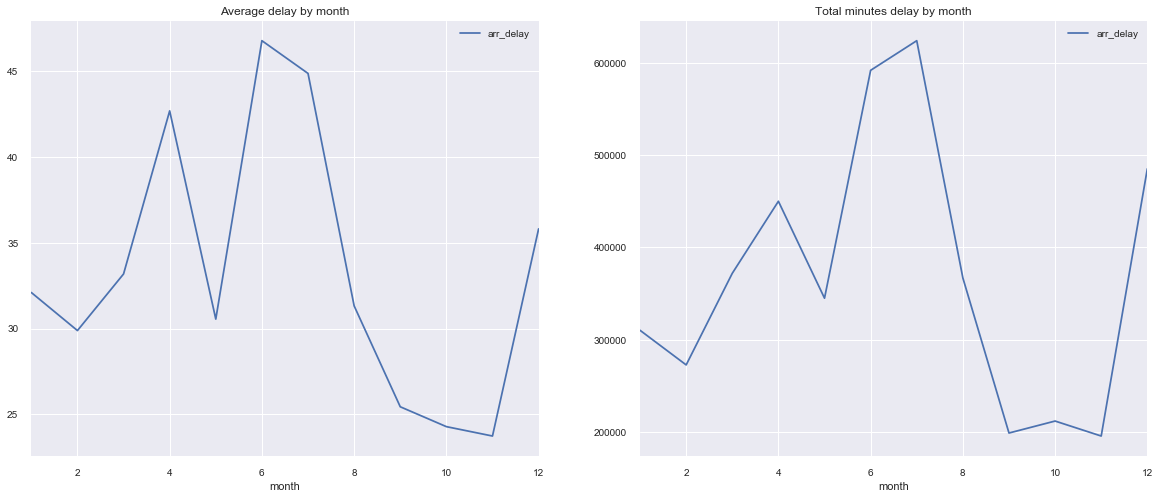

In [0]:
# 7. Monthly categorization of delay

Delayedflights = df_flighttime[(df_flighttime.Status == 'Delayed_Departure')]
f,ax=nyc_plt.subplots(1,2,figsize=(20,8))
Delayedflights[['month','arr_delay']].groupby(['month']).mean().plot(ax=ax[0])
ax[0].set_title('Average delay by month')
Delayedflights[['month','arr_delay']].groupby(['month']).sum().plot(ax=ax[1])
ax[1].set_title('Total minutes delay by month')
nyc_plt.show()

#More Delays during April, June and July 2013, with a least delay during Nov 2013.

In [0]:
# 7. How many short distance flights (air_time <= 120 mins)
# 8. How many are long distance flights (air_time >120 mins)

for flightdist in df_flighttime:
    df_flighttime.loc[df_flighttime['air_time'] <= '120', 'FlightLength'] = 'Short_Flight'
    df_flighttime.loc[df_flighttime['air_time'] > '120', 'FlightLength'] = 'Long_Dist_Flight'

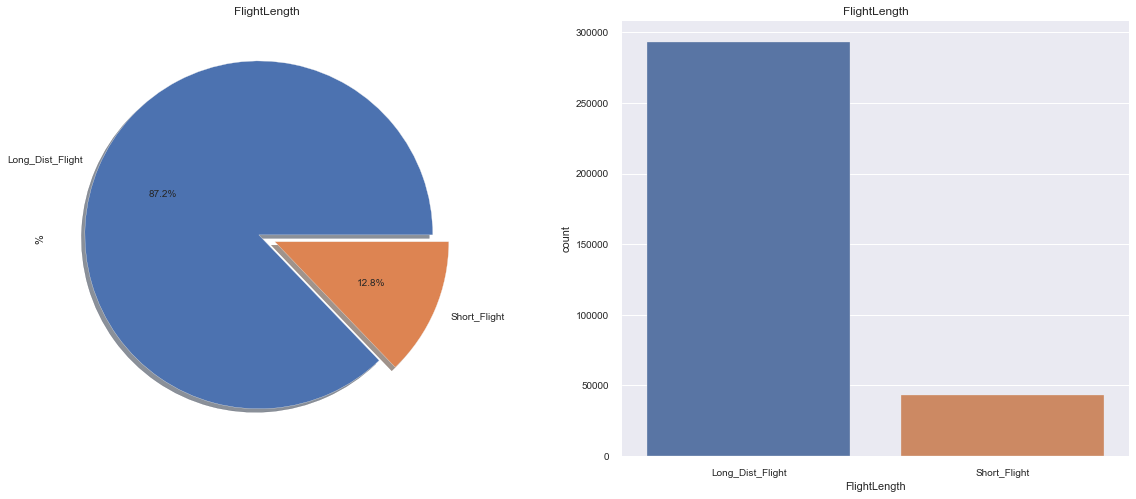

FlightLength represents wether the flight was Short Flight (upto 1 Hr), Medium Dist Flight (1 to 2 Hrs), Long Dist Flight(more than 2 Hrs)


In [0]:
f,ax=nyc_plt.subplots(1,2,figsize=(20,8))
df_flighttime['FlightLength'].value_counts().plot.pie(explode=[0.05,0.05],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('FlightLength')
ax[0].set_ylabel('%')
sns.countplot('FlightLength',order = df_flighttime['FlightLength'].value_counts().index, data=df_flighttime,ax=ax[1])
ax[1].set_title('FlightLength')
nyc_plt.show()

print('FlightLength represents wether the flight was Short Flight (upto 1 Hr), Medium Dist Flight (1 to 2 Hrs), Long Dist Flight(more than 2 Hrs)')

In [0]:
# Inferences which can be drawn from EDA 

#This data is only for 1 year. This it would be too hasty to make significant inferences from this data
#So far we can conclude that all 3 airports in NYC are equally busy. 

#United Airlines(UA), Jet Blue (B9) and Delta Airlines (DL) are most busy airlines.
#However there is signifcant difference in usage of top 4 airlines vs others

#O'Hare (ORD), Atlanta (ATL) and Los Angeles (LAX) are top 3 destinations US prefered by the custmers.

#Many flights are getting departed before time (more than 50%)
#HoweverSignificant number of flights (38%) are having delayed departure.

#More Delays are happening during April, June and July 2013, with a least delay during Nov 2013.

# Majority of the flights getting departed are more than 2 hrs of flight.



#Actionable Insights

#While the dataset itself doesn't offer a solution to the delay issue, it's clear that delay reduction has many intertwined variables. 

#It is also important to identify if any operational delay of ground staff or any late reporting of passengers at the gate having compunding effects on delays

#Also it is importat to note if a solution applicable to one type of delay will heavily affect the others, resulting in a compounded effect that will allow more 
#efficient operations; benefiting passengers, airports, carriers.

#It is also important to get multiple last few years of data to see any improvements or detoriation observed over years. 

#Also it is must to have weather details to have correct insigts.




























